### Get a house with a full set of sensor info

In [57]:
import sys
sys.path.append('/Users/barry/CodeAcademy/Ideal_dataset/coding/API/')

In [58]:
import os

In [59]:
import numpy as np
import pandas as pd

from IdealDataInterface import IdealDataInterface

In [60]:
from IdealMetadataInterface import IdealMetadataInterface

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
import plotly.graph_objects as go


In [63]:
import datetime

In [64]:
folder_path = '/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata'
mdi = IdealMetadataInterface(folder_path)  

##### I want to be able to see all columns in a row

In [65]:
pd.set_option('display.max_columns', None)

#### make a DF with just the electric appliances in it

In [66]:
def df_appliance(homeid):
    folder_path_appliances = '/Users/barry/CodeAcademy/Ideal_dataset/room_and_appliance_sensors/sensordata'
    ideal_appliances = IdealDataInterface(folder_path_appliances)
    view_df = ideal_appliances.view(homeid = homeid) #will allow us to get the sensorids
    df = pd.DataFrame() #creat an empty dataframe to store the electric info
    sensor_list = list(view_df[view_df.category == 'electric-appliance'].sensorid) #appliance sensor id's for the provided house
    if len(sensor_list) > 0: #DF only gets populated if there are monitored appliances
        electrics_appliance_info = ideal_appliances.get(sensorid = sensor_list) #appliance info as a list with extra infor
        for appliance in electrics_appliance_info: #cycle through the list importing it to the dataframe
            df[appliance['subtype']] = appliance['readings']
    else:
        print('no monitored appliances')
    try:
        df = df.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding
        df = df.fillna(0) # get rid of the NaN values
    except:
        pass
    return df
df_appliance(106)

Found entries for 4824 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/601736614.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


,kettle,microwave,fridgefreezer,washingmachine
time,,,,
2017-05-17 18:00:00,246,0.0,0.0,0.0
2017-05-17 19:00:00,0,0.0,0.0,0.0
2017-05-17 20:00:00,0,0.0,0.0,0.0
2017-05-17 21:00:00,0,0.0,0.0,0.0
2017-05-17 22:00:00,0,0.0,0.0,0.0
...,...,...,...,...
2018-06-14 07:00:00,0,0.0,0.0,0.0
2018-06-14 08:00:00,0,0.0,0.0,0.0
2018-06-14 09:00:00,0,0.0,0.0,0.0


# Lets get the main electric data

In [67]:
def df_dwelling(homeid):
    folder_path_dwelling = '/Users/barry/CodeAcademy/Ideal_dataset/sensordata'
    ideal_dwelling = IdealDataInterface(folder_path_dwelling)
    sensor_list = list(ideal_dwelling.view(homeid = homeid).sensorid)
    df_dwelling = pd.DataFrame() #creat an empty dataframe to store the electric info
    dwelling_info = ideal_dwelling.get(sensorid = sensor_list)
    if len(dwelling_info) > 0:
        for sensor in dwelling_info:
            df_dwelling[sensor['subtype']] = sensor['readings']
    else:
        print('no relevant dwelling sensors')
    try:
        df_dwelling = df_dwelling.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding
        df_dwelling = df_dwelling.fillna(0) # get rid of the NaN values
    except:
        pass
    return df_dwelling
    



In [68]:
def weather_getter(homeid): 
    folder_path = '/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata'
    mdi = IdealMetadataInterface(folder_path)     
    home_info = mdi.metadata.homes['home']
    home_info = home_info[home_info.homeid == homeid]
    home_info =home_info.reset_index()
    weather_location = home_info.location.iloc[0]
    print(weather_location)
    if weather_location == 'Edinburgh':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/edinburgh_weather.csv')
        
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'Midlothian':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/midlothian_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'WestLothian':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/westlothian_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'EastLothian':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/eastlothian_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    elif weather_location == 'Fife':
        weather_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/Weather/kirkcaldy_weather.csv')
        weather_csv.columns = list(weather_csv.iloc[1])
        weather_csv = weather_csv.iloc[2:,:]
        weather_csv.set_index('time', inplace=True)
        weather_csv.index = pd.to_datetime(weather_csv.index)
    

    else:
        print('weather_location_wrong')
    return weather_csv



In [69]:
weather_getter(100)

Midlothian


,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°)
time,,,,,
2016-06-01 00:00:00,9.7,90,2,10.7,40
2016-06-01 01:00:00,9.4,90,1,9.4,40
2016-06-01 02:00:00,9.0,90,1,8.7,42
2016-06-01 03:00:00,8.6,91,1,9.2,45
2016-06-01 04:00:00,8.4,91,1,9.5,37
...,...,...,...,...,...
2018-07-30 19:00:00,13.9,93,61,2.6,34
2018-07-30 20:00:00,14.0,95,3,6.9,219
2018-07-30 21:00:00,14.6,88,51,9.3,234


### combining my DFs

In [70]:
def df_combined(homeid):
    df_app = df_appliance(homeid)
    df_dw = df_dwelling(homeid)
    df_weather = weather_getter(homeid)
    df_combined = pd.concat([df_app, df_dw], axis = 1)
    merged_df = df_combined.join(df_weather, how = 'inner')
    
    # merged_df.columns = ['kettle', 'microwave', 'fridgefreezer', 'washingmachine',
    #    'hot-water-hot-pipe', 'hot-water-cold-pipe', 'gas', 'shower', 'mains',
    #    'cooker', 'electric-combined', 'central-heating-flow',
    #    'central-heating-return', 'temperature_2m',
    #    'relative_humidity_2m', 'weather_code',
    #    'wind_speed', 'wind_direction']
    merged_df['electric_combined_1h_lagged'] = merged_df['electric-combined'].shift(1)
    merged_df['electric_combined_1W_lagged'] = merged_df['electric-combined'].shift(128)
    merged_df['electric_combined_1W_lagged_avg'] = (merged_df['electric-combined'].shift(127) + merged_df['electric-combined'].shift(128) + merged_df['electric-combined'].shift(198)/3)
    merged_df['predicted_temperature_2m'] = merged_df['temperature_2m (°C)'].shift(-1)
    merged_df['predicted_weather_code'] = merged_df['weather_code (wmo code)'].shift(-1)
    merged_df['predicted_wind_speed'] = merged_df['wind_speed_10m (km/h)'].shift(-1)
    merged_df['predicted_wind_direction'] = merged_df['wind_direction_10m (°)'].shift(-1)
    merged_df['predicted_humidity'] = merged_df['relative_humidity_2m (%)'].shift(-1)
    merged_df['day'] = merged_df.index.weekday
    merged_df['hour']= merged_df.index.hour
    if 'mains' in merged_df.columns:
        first_non_zero = merged_df['mains'].ne(0).idxmax()
        merged_df = merged_df.loc[first_non_zero:]
    else:
        pass
    merged_df = merged_df.iloc[5:]
    first_non_zero = merged_df['electric-combined'].ne(0).idxmax()
    merged_df = merged_df.loc[first_non_zero:]
    if os.path.exists(f'/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_{homeid}.csv'):
        print(f'file already exists for {homeid}')
    else:
        merged_df.to_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_{homeid}.csv')



    

    return merged_df

In [71]:
df_106 = df_combined(106)


Found entries for 4824 sensor readings.
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/601736614.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/2682361694.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_dwelling = df_dwelling.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


Edinburgh
file already exists for 106


In [72]:
df_106.head(10)

,kettle,microwave,fridgefreezer,washingmachine,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,electric_combined_1W_lagged_avg,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-17 19:00:00,0.0,0.0,0.0,0.0,50684,0.0,0.0,406.0,4682.0,126.0,21684.0,0.0,0.0,13.7,74,51,3.4,288,19911.0,22176.0,53005.333333,12.0,51,5.9,259,75,2,19
2017-05-17 20:00:00,0.0,0.0,0.0,0.0,52473,0.0,112.0,429.0,5533.0,144.0,24725.0,0.0,0.0,12.0,75,51,5.9,259,21684.0,22365.0,51932.666667,11.5,2,9.2,231,74,2,20
2017-05-17 21:00:00,0.0,0.0,0.0,0.0,59519,0.0,112.0,526.0,4794.0,177.0,23257.0,0.0,0.0,11.5,74,2,9.2,231,24725.0,21712.0,50107.666667,10.4,1,11.2,222,80,2,21
2017-05-17 22:00:00,0.0,0.0,0.0,0.0,58237,0.0,0.0,495.0,4493.0,165.0,22844.0,0.0,0.0,10.4,80,1,11.2,222,23257.0,21107.0,49430.666667,9.8,1,11.5,226,84,2,22
2017-05-17 23:00:00,0.0,0.0,0.0,0.0,74016,0.0,0.0,478.0,13544.0,27.0,62672.0,9748.0,9840.0,9.8,84,1,11.5,226,22844.0,21119.0,98747.333333,10.0,3,9.2,231,82,2,23
2017-05-18 00:00:00,0.0,0.0,0.0,0.0,65882,0.0,0.0,471.0,6905.0,5.0,33424.0,19942.0,20160.0,10.0,82,3,9.2,231,62672.0,70752.0,150206.000000,9.5,2,9.8,234,84,3,0
2017-05-18 01:00:00,0.0,0.0,0.0,0.0,61611,0.0,0.0,525.0,7128.0,11.0,31671.0,0.0,0.0,9.5,84,2,9.8,234,33424.0,72517.0,147567.666667,8.9,2,10.1,235,86,3,1
2017-05-18 02:00:00,0.0,0.0,0.0,0.0,58942,0.0,0.0,517.0,6619.0,10.0,30774.0,0.0,0.0,8.9,86,2,10.1,235,31671.0,64673.0,140720.000000,8.7,1,9.0,233,87,3,2
2017-05-18 03:00:00,0.0,0.0,0.0,0.0,58074,0.0,0.0,503.0,6387.0,9.0,29703.0,0.0,0.0,8.7,87,1,9.0,233,30774.0,62959.0,143863.666667,8.2,1,11.5,238,89,3,3


In [73]:
df_106.tail()

,kettle,microwave,fridgefreezer,washingmachine,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,electric_combined_1W_lagged_avg,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-14 07:00:00,0.0,0.0,0.0,0.0,53454,52716.0,0.0,29886.0,42084.0,1.0,210157.0,14430.0,14430.0,16.0,73,51,41.0,218,362447.0,22521.0,53283.000000,16.0,3,47.3,215,67,3,7
2018-06-14 08:00:00,0.0,0.0,0.0,0.0,56673,55699.0,0.0,431.0,3408.0,1.0,24691.0,0.0,0.0,16.0,67,3,47.3,215,210157.0,22583.0,51719.666667,14.4,1,58.4,236,70,3,8
2018-06-14 09:00:00,0.0,0.0,0.0,0.0,55770,55080.0,0.0,422.0,3303.0,5.0,23719.0,0.0,0.0,14.4,70,1,58.4,236,24691.0,21798.0,50939.000000,14.6,51,57.9,254,70,3,9
2018-06-14 10:00:00,0.0,0.0,0.0,0.0,54210,53658.0,0.0,397.0,3296.0,1.0,23318.0,0.0,0.0,14.6,70,51,57.9,254,23719.0,20769.0,58883.333333,14.6,51,54.5,262,61,3,10
2018-06-14 11:00:00,0.0,0.0,0.0,0.0,29073,28815.0,0.0,238.0,4219.0,2.0,24151.0,0.0,0.0,14.6,61,51,54.5,262,23318.0,30837.0,65467.000000,None,None,None,None,None,3,11


### Lets have  a look at the DF to see if it accords to expectations

In [74]:
df_106.head()




,kettle,microwave,fridgefreezer,washingmachine,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,electric_combined_1W_lagged_avg,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-17 19:00:00,0.0,0.0,0.0,0.0,50684,0.0,0.0,406.0,4682.0,126.0,21684.0,0.0,0.0,13.7,74,51,3.4,288,19911.0,22176.0,53005.333333,12.0,51,5.9,259,75,2,19
2017-05-17 20:00:00,0.0,0.0,0.0,0.0,52473,0.0,112.0,429.0,5533.0,144.0,24725.0,0.0,0.0,12.0,75,51,5.9,259,21684.0,22365.0,51932.666667,11.5,2,9.2,231,74,2,20
2017-05-17 21:00:00,0.0,0.0,0.0,0.0,59519,0.0,112.0,526.0,4794.0,177.0,23257.0,0.0,0.0,11.5,74,2,9.2,231,24725.0,21712.0,50107.666667,10.4,1,11.2,222,80,2,21
2017-05-17 22:00:00,0.0,0.0,0.0,0.0,58237,0.0,0.0,495.0,4493.0,165.0,22844.0,0.0,0.0,10.4,80,1,11.2,222,23257.0,21107.0,49430.666667,9.8,1,11.5,226,84,2,22
2017-05-17 23:00:00,0.0,0.0,0.0,0.0,74016,0.0,0.0,478.0,13544.0,27.0,62672.0,9748.0,9840.0,9.8,84,1,11.5,226,22844.0,21119.0,98747.333333,10.0,3,9.2,231,82,2,23


In [75]:
df_106.tail()

,kettle,microwave,fridgefreezer,washingmachine,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,electric_combined_1W_lagged_avg,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-14 07:00:00,0.0,0.0,0.0,0.0,53454,52716.0,0.0,29886.0,42084.0,1.0,210157.0,14430.0,14430.0,16.0,73,51,41.0,218,362447.0,22521.0,53283.000000,16.0,3,47.3,215,67,3,7
2018-06-14 08:00:00,0.0,0.0,0.0,0.0,56673,55699.0,0.0,431.0,3408.0,1.0,24691.0,0.0,0.0,16.0,67,3,47.3,215,210157.0,22583.0,51719.666667,14.4,1,58.4,236,70,3,8
2018-06-14 09:00:00,0.0,0.0,0.0,0.0,55770,55080.0,0.0,422.0,3303.0,5.0,23719.0,0.0,0.0,14.4,70,1,58.4,236,24691.0,21798.0,50939.000000,14.6,51,57.9,254,70,3,9
2018-06-14 10:00:00,0.0,0.0,0.0,0.0,54210,53658.0,0.0,397.0,3296.0,1.0,23318.0,0.0,0.0,14.6,70,51,57.9,254,23719.0,20769.0,58883.333333,14.6,51,54.5,262,61,3,10
2018-06-14 11:00:00,0.0,0.0,0.0,0.0,29073,28815.0,0.0,238.0,4219.0,2.0,24151.0,0.0,0.0,14.6,61,51,54.5,262,23318.0,30837.0,65467.000000,None,None,None,None,None,3,11


In [76]:
df_106.sample(20)

,kettle,microwave,fridgefreezer,washingmachine,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,electric_combined_1W_lagged_avg,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-27 02:00:00,0.0,0.0,0.0,0.0,50291,49787.0,0.0,435.0,3567.0,4.0,24262.0,20535.0,20535.0,7.0,84,3,23.4,256,23674.0,24577.0,57000.000000,6.3,3,21.6,255,82,0,2
2017-10-28 13:00:00,0.0,0.0,0.0,0.0,49383,0.0,0.0,479.0,4674.0,2.0,17930.0,0.0,0.0,13.8,87,2,35.4,253,20055.0,17698.0,49207.333333,13.9,3,36.7,259,86,5,13
2018-04-02 17:00:00,0.0,0.0,0.0,0.0,27530,26049.0,0.0,294.0,4224.0,2086.0,24519.0,0.0,0.0,1.8,93,73,29.8,70,17549.0,24011.0,55918.000000,1.5,73,30.7,68,96,0,17
2017-09-17 03:00:00,0.0,0.0,0.0,0.0,51381,0.0,0.0,472.0,6766.0,3.0,34634.0,0.0,0.0,9.0,89,1,6.8,342,33391.0,26599.0,81122.000000,8.7,1,6.1,332,90,6,3
2017-07-31 01:00:00,0.0,0.0,0.0,0.0,62378,0.0,0.0,465.0,6596.0,0.0,31275.0,0.0,0.0,12.7,85,51,11.0,203,28001.0,33130.0,91205.000000,12.8,51,9.2,211,83,0,1
2018-05-24 02:00:00,0.0,0.0,0.0,0.0,45488,44497.0,0.0,506.0,4323.0,4.0,25461.0,0.0,0.0,7.3,89,1,4.3,90,21789.0,30333.0,156011.000000,6.4,1,4.3,85,92,3,2
2017-07-31 17:00:00,0.0,0.0,0.0,0.0,83677,0.0,223.0,388.0,41988.0,1.0,239264.0,0.0,0.0,16.2,66,1,18.9,222,29224.0,29018.0,81361.333333,15.6,1,20.2,221,69,0,17
2017-06-17 03:00:00,0.0,0.0,0.0,0.0,56430,0.0,0.0,449.0,6631.0,3.0,32663.0,0.0,0.0,15.5,88,3,18.4,242,31147.0,27662.0,77058.666667,16.0,3,19.2,242,86,5,3
2018-01-23 14:00:00,0.0,0.0,0.0,0.0,53607,52510.0,0.0,445.0,3286.0,3.0,23924.0,0.0,0.0,9.9,85,53,28.6,228,26727.0,23538.0,95498.666667,9.0,61,23.5,230,87,1,14


In [77]:
list_home_ids = ['100', '101', '102', '105', '106', '107', '109', '110', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '128', '129', '133', '134', '135', '136', '137', '138', '139', '140', '141', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '197', '199', '200', '201', '202', '203', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '218', '219', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '313', '315', '316', '317', '318', '319', '320', '321', '322', '323', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '47', '59', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '88', '89', '90', '91', '92', '93', '94', '96', '97', '98', '99']
list_home_ids =[int(i) for i in list_home_ids]
list_home_ids = sorted(list_home_ids)

In [78]:
print(list_home_ids)

[47, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 105, 106, 107, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284

In [79]:
still_to_do =[224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 313, 315, 316, 317, 318, 319, 320, 321, 322, 323, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335]

In [80]:
print(len(list_home_ids))

255


In [81]:
# count = 0
# for val in still_to_do:
#     print(val)
#     df_combined(val)
#     count += 1
#     print(count)

In [82]:
df_47 = df_combined(47)

Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/601736614.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


Edinburgh
file already exists for 47


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/2682361694.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_dwelling = df_dwelling.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


In [83]:
df_47.head()

,hot-water-hot-pipe,gas,central-heating-return,electric-combined,central-heating-flow,hot-water-cold-pipe,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,electric_combined_1W_lagged_avg,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
time,,,,,,,,,,,,,,,,,,,,,
2016-08-10 14:00:00,67257,0.0,32850.0,14986.0,32734.0,65220,12.6,79,51,13.3,237,18768.0,NaN,NaN,12.7,51,13.6,233,81,2,14
2016-08-10 15:00:00,66100,0.0,5720.0,15925.0,5720.0,64490,12.7,81,51,13.6,233,14986.0,NaN,NaN,12.6,51,14.8,221,85,2,15
2016-08-10 16:00:00,65445,0.0,0.0,35880.0,0.0,64495,12.6,85,51,14.8,221,15925.0,NaN,NaN,12.5,51,16.1,222,90,2,16
2016-08-10 17:00:00,66967,0.0,0.0,44094.0,0.0,66020,12.5,90,51,16.1,222,35880.0,NaN,NaN,12.7,53,17.0,234,94,2,17
2016-08-10 18:00:00,65003,0.0,0.0,36448.0,0.0,63710,12.7,94,53,17.0,234,44094.0,NaN,NaN,12.7,53,18.7,245,94,2,18


#### Need to check the metrics are consistent

#### Lets get the information from the home.csv

In [84]:
def home_info(homeid):

    #print('home_info')

    home_info = mdi.metadata.homes['home']
    home_info = home_info[home_info.homeid == homeid]
    home_info =home_info.reset_index()
    #display(home_info)

    appliance_list = ['fridgefreezer', 'grill', 'toaster', 'kettle', 'electricoven',
       'washingmachine', 'freezer', 'fridge', 'microwave', 'dishwasher',
       'vacuumcleaner', 'electrichob', 'washingmachinetumbledrier',
       'electricshower', 'electricheater', 'tumbledrier', 'dehumidifier',
       'other']

    df_appliance = pd.DataFrame([0]*len(appliance_list), index=appliance_list).T
    appliance_info = mdi.metadata.appliances['appliance']
    appliance_info = appliance_info[appliance_info.homeid == homeid]
    for val in df_appliance.columns:
        if val in list(appliance_info.appliancetype):
            df_appliance[val]= 1
        else:
            df_appliance[val] = 0
    #display(df_appliance)


    #print('weather center')
    location_info = mdi.metadata.locations['location']
    location = home_info.location.iloc[0]
    location_info = location_info[location_info.locationid == location]
    #display(location_info)


    #print('people info')
    people_info = mdi.metadata.people['person']
    people_info = people_info[people_info.homeid == homeid].reset_index()
    #display(people_info)

    #print('tariff info')
    df_tariff = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata/tariff.csv')
    #display(df_tariff[(df_tariff.homeid == homeid) & (df_tariff.energytype == 'electricity')])

    #print('meter reading')
    df_meter = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata/meterreading.csv')
    #display(df_meter[(df_meter.homeid == 106) & (df_meter.energytype == 'electricity')])    

    room_info = mdi.metadata.rooms['room']
    room_info = room_info[room_info.homeid == homeid]
    #display(room_info[room_info.homeid == homeid])

    room_info_condensed = pd.DataFrame({'number_of_rooms': [len(room_info)]})
    room_info_condensed['sqm'] = room_info.floorarea.sum()
    #display(room_info_condensed)
    df_all = pd.merge(home_info, df_appliance, left_index=True, right_index=True) 
    df_all = pd.merge(df_all, location_info, left_index=True, right_index=True)
    df_all = pd.merge(df_all, people_info, left_index=True, right_index=True)


    display(df_all)
    display(df_all.shape)




home_info(106)

,index_x,homeid_x,install_type,location,residents,starttime,starttime_enhanced,endtime,cohortid,income_band,study_class,hometype,equivalised_income,occupancy,urban_rural_class,urban_rural_name,build_era,new_build_year,smart_monitors,smart_automation,occupied_days,occupied_nights,entry_floor,outdoor_space,outdoor_drying,fridgefreezer,grill,toaster,kettle,electricoven,washingmachine,freezer,fridge,microwave,dishwasher,vacuumcleaner,electrichob,washingmachinetumbledrier,electricshower,electricheater,tumbledrier,dehumidifier,other,locationid,weather_centre,index_y,personid,homeid_y,primaryparticipant,relationtoprimary,gender,ageband,workingstatus,weeklyhoursofwork,education,ageleavingeducation,signedup,startdate,highest_earner
0,43,106,enhanced,Edinburgh,1,13/04/2017 03:00,17/05/2017 03:00,14/06/2018 11:30,enhanced_20170614,"£32,400 to £37,799",enhanced,flat,above_median,single,1,Large Urban Areas,1991-1995,NaN,Don't own,Don't own,2,5,2nd,Yes - shared with neighbours,No,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,Edinburgh,Edinburgh,102,723,106,1,NaN,Female,30-34,Paid work,31-40,"Degree level qualification (or equivalent), e....",21.0,1,2017-04-13,0


(1, 59)

In [85]:
df_meter = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata/meterreading.csv')
display(df_meter[(df_meter.homeid == 106) & (df_meter.energytype == 'electricity')])



,homeid,provenance,provenancedetail,energytype,date,reading
475,106,723,all_web_end,electricity,2018-06-15,20851.0


In [86]:

appliance_info = mdi.metadata.appliances['appliance'][mdi.metadata.appliances['appliance'].powertype == 'electric'].appliancetype.unique()
display(appliance_info)


array(['fridgefreezer', 'grill', 'toaster', 'kettle', 'electricoven',
       'washingmachine', 'freezer', 'fridge', 'microwave', 'dishwasher',
       'vacuumcleaner', 'electrichob', 'washingmachinetumbledrier',
       'electricshower', 'electricheater', 'tumbledrier', 'dehumidifier',
       'other'], dtype=object)

In [87]:
mdi.metadata.locations.location

,locationid,weather_centre
0,Edinburgh,Edinburgh
1,WestLothian,Livingston
2,Midlothian,Penicuik
3,EastLothian,North Berwick
4,Fife,Kirkcaldy


In [88]:
df_106 = df_dwelling(106)

Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/2682361694.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_dwelling = df_dwelling.resample('1H').sum().round(2) #resample the data to 30 minute intervals as that is the grid's reconcilliation period (and is easier) and also rounding


In [89]:
df_106.head(1)

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return
time,,,,,,,,,
2017-04-13 10:00:00,71968,0.0,223.0,0.0,0.0,0.0,57887.0,0.0,0.0


In [90]:
start_date = pd.to_datetime('2017-06-01')
end_date = pd.to_datetime('2018-06-01')
df_106_year = df_106.loc[start_date:end_date]

In [91]:
df_106_year.head(10)

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return
time,,,,,,,,,
2017-06-01 00:00:00,59406,0.0,0.0,478.0,5721.0,5.0,29170.0,28803.0,28810.0
2017-06-01 01:00:00,59607,0.0,0.0,477.0,6098.0,7.0,29123.0,0.0,0.0
2017-06-01 02:00:00,58265,0.0,0.0,474.0,6454.0,11.0,30653.0,0.0,0.0
2017-06-01 03:00:00,58016,0.0,0.0,458.0,6113.0,9.0,29147.0,0.0,0.0
2017-06-01 04:00:00,58418,0.0,0.0,485.0,6142.0,8.0,28649.0,0.0,0.0
2017-06-01 05:00:00,54600,0.0,0.0,19659.0,26465.0,5.0,109881.0,0.0,0.0
2017-06-01 06:00:00,69912,0.0,0.0,439.0,8150.0,1.0,41729.0,0.0,0.0
2017-06-01 07:00:00,66082,0.0,0.0,473.0,8367.0,3.0,42592.0,0.0,0.0
2017-06-01 08:00:00,60445,0.0,0.0,478.0,6531.0,3.0,30883.0,0.0,0.0


In [92]:
df_106_year.index

DatetimeIndex(['2017-06-01 00:00:00', '2017-06-01 01:00:00',
               '2017-06-01 02:00:00', '2017-06-01 03:00:00',
               '2017-06-01 04:00:00', '2017-06-01 05:00:00',
               '2017-06-01 06:00:00', '2017-06-01 07:00:00',
               '2017-06-01 08:00:00', '2017-06-01 09:00:00',
               ...
               '2018-05-31 15:00:00', '2018-05-31 16:00:00',
               '2018-05-31 17:00:00', '2018-05-31 18:00:00',
               '2018-05-31 19:00:00', '2018-05-31 20:00:00',
               '2018-05-31 21:00:00', '2018-05-31 22:00:00',
               '2018-05-31 23:00:00', '2018-06-01 00:00:00'],
              dtype='datetime64[ns]', name='time', length=8761, freq='h')

In [93]:
import matplotlib.dates as mdates


In [94]:
df_106.head()

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return
time,,,,,,,,,
2017-04-13 10:00:00,71968,0.0,223.0,0.0,0.0,0.0,57887.0,0.0,0.0
2017-04-13 11:00:00,84989,0.0,0.0,0.0,0.0,0.0,66525.0,0.0,0.0
2017-04-13 12:00:00,62355,0.0,0.0,0.0,0.0,0.0,27318.0,0.0,0.0
2017-04-13 13:00:00,51814,0.0,0.0,0.0,0.0,0.0,70616.0,0.0,0.0
2017-04-13 14:00:00,63958,0.0,0.0,0.0,0.0,0.0,280779.0,0.0,0.0


In [95]:
def hourly_consumption(df, homeid =None):
    fig, ax = plt.subplots(figsize = (35, 5))
    sns.lineplot(data = df, x = df.index, y = 'electric-combined', ax = ax)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.legend(['mains'])
    fig.suptitle(f'Hourly electricity consumption for home {homeid}')
        # Calculate the average hourly consumption
    average_consumption = df['electric-combined'].mean()

    # Draw a horizontal line at the average consumption
    ax.axhline(y=average_consumption, color='r', linestyle='--')



    plt.show()

    average_consumption = df['electric-combined'].mean()
    display(f'average daily consumption: {average_consumption}')


In [96]:
def hourly_consumption2(df, homeid=None):
    # Calculate the average hourly consumption
    average_consumption = df['electric-combined'].mean()

    fig = go.Figure()

    # Add line plot
    fig.add_trace(go.Scatter(x=df.index, y=df['electric-combined'], mode='lines', name='mains'))

    # Add horizontal line at the average consumption
    fig.add_shape(type="line",
                  x0=df.index.min(), y0=average_consumption,
                  x1=df.index.max(), y1=average_consumption,
                  line=dict(color="Red", width=2, dash="dash"))

    fig.update_layout(
        title=f'Hourly electricity consumption for home {homeid}',
        xaxis_title="Date",
        yaxis_title="Electric Combined",
        autosize=False,
        width=1000,
        height=500,
        xaxis=dict(
            tickformat="%Y-%m-%d %H:%M"  # Display x-axis labels in the format "Year-Month-Day Hour:Minute"
        )
    )

    fig.show()

    print(f'average daily consumption: {average_consumption}')

In [97]:
hourly_consumption2(df_106, 106)

average daily consumption: 45736.0476097561


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



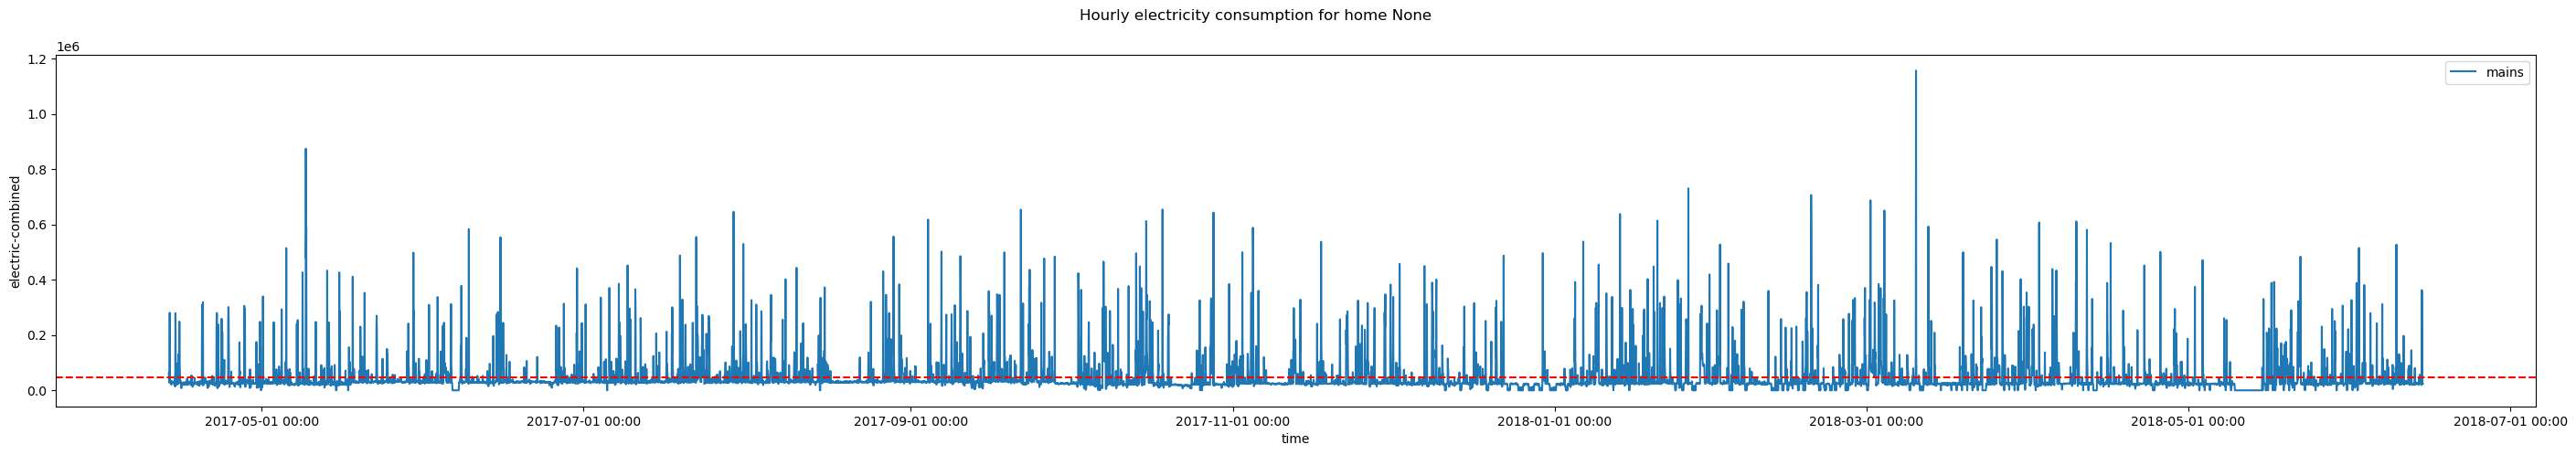

'average daily consumption: 45736.0476097561'

In [98]:
hourly_consumption(df_106)

In [99]:
def heatmap(df, homeid=None):
    data = df[['electric-combined']]
    pivot_data = data.pivot_table(index = data.index.date, columns = data.index.hour, values = 'electric-combined')
    plt.figure(figsize=(10,8))
    sns.heatmap(pivot_data, cmap = 'Oranges')
    plt.suptitle(f'Hourly electricity consumption for home {homeid}')
    plt.show()


In [100]:

def heatmap2(df, homeid=None):
    data = df[['electric-combined']]
    pivot_data = data.pivot_table(index = data.index.date, columns = data.index.hour, values = 'electric-combined')

    fig = go.Figure(data=go.Heatmap(
                   z=pivot_data.values,
                   x=pivot_data.columns,
                   y=pivot_data.index,
                   colorscale='Oranges',
                   hovertemplate='Day: %{y}<br>Time: %{x}<br>Value: %{z}<extra></extra>'
                   ))

    fig.update_layout(
        title=f'Hourly electricity consumption for home {homeid}',
        xaxis_nticks=36,
        width=800,
        height = 800,
        xaxis_title="Hour of the day",
        yaxis_title = 'Date')

    fig.show()

In [101]:
heatmap2(df_106)

In [102]:
#lets get a graph showing the number of hours producing
display(df_106.head())

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return
time,,,,,,,,,
2017-04-13 10:00:00,71968,0.0,223.0,0.0,0.0,0.0,57887.0,0.0,0.0
2017-04-13 11:00:00,84989,0.0,0.0,0.0,0.0,0.0,66525.0,0.0,0.0
2017-04-13 12:00:00,62355,0.0,0.0,0.0,0.0,0.0,27318.0,0.0,0.0
2017-04-13 13:00:00,51814,0.0,0.0,0.0,0.0,0.0,70616.0,0.0,0.0
2017-04-13 14:00:00,63958,0.0,0.0,0.0,0.0,0.0,280779.0,0.0,0.0


In [103]:
df_106['electric-combined'].max()

1156703.0

In [104]:
def bin_builder(df):
    count_under_10000 = df[(df['electric-combined'] < 10000)].gas.count()
    count_between_10000_20000 = df[(df['electric-combined'] >= 10000) & (df['electric-combined'] < 20000)].gas.count()
    count_between_20000_30000 = df[(df['electric-combined'] >= 20000) & (df['electric-combined'] < 30000)].gas.count()
    count_between_30000_40000 = df[(df['electric-combined'] >= 30000) & (df['electric-combined'] < 40000)].gas.count()
    count_between_40000_50000 = df[(df['electric-combined'] >= 40000) & (df['electric-combined'] < 50000)].gas.count()
    count_between_50000_60000 = df[(df['electric-combined'] >= 50000) & (df['electric-combined'] < 60000)].gas.count()
    count_between_60000_70000 = df[(df['electric-combined'] >= 60000) & (df['electric-combined'] < 70000)].gas.count()
    count_between_70000_80000 = df[(df['electric-combined'] >= 70000) & (df['electric-combined'] < 80000)].gas.count()

 
    count_over_80000 = df[(df['electric-combined'] >= 80000)].gas.count()
    bins = [count_under_10000, count_between_10000_20000, count_between_20000_30000, count_between_30000_40000, count_between_40000_50000,count_between_50000_60000,count_between_60000_70000,count_between_70000_80000, count_over_80000]
    return bins

In [105]:
# def bin_builder(df):
#     count_under_50 = df[(df['electric-combined'] < 50)].gas.count()
#     count_between_50_100 = df[(df['electric-combined'] >= 50) & (df['electric-combined'] < 100)].gas.count()
#     count_between_100_150 = df[(df['electric-combined'] >= 100) & (df['electric-combined'] < 150)].gas.count()
#     count_between_150_200 = df[(df['electric-combined'] >= 150) & (df['electric-combined'] < 200)].gas.count()
#     count_between_200_300 = df[(df['electric-combined'] >= 200) & (df['electric-combined'] < 300)].gas.count()
#     count_between_300_400 = df[(df['electric-combined'] >= 300) & (df['electric-combined'] < 400)].gas.count()
#     count_between_400_500 = df[(df['electric-combined'] >= 400) & (df['electric-combined'] < 500)].gas.count()
#     count_between_500_750 = df[(df['electric-combined'] >= 500) & (df['electric-combined'] < 750)].gas.count()
#     count_between_750_1000 = df[(df['electric-combined'] >= 750) & (df['electric-combined'] < 1000)].gas.count()
#     count_between_1000_1500 = df[(df['electric-combined'] >= 1000) & (df['electric-combined'] < 1500)].gas.count()
#     count_between_1500_2000 = df[(df['electric-combined'] >= 1500) & (df['electric-combined'] < 2000)].gas.count()
#     count_over_2000 = df[(df['electric-combined'] >= 2000)].gas.count()
#     bins = [count_under_50, count_between_50_100, count_between_100_150, count_between_150_200, count_between_200_300, count_between_300_400, count_between_400_500, count_between_500_750, count_between_750_1000, count_between_1000_1500, count_between_1500_2000, count_over_2000]
#     return bins

In [106]:
def power_hour_count(df, homeid=None):

    bins = bin_builder(df)


    counts = {
        'count_under_10000': bins[0],
        'count_between_10000_20000': bins[1],
        'count_between_20000_30000': bins[2],
        'count_between_30000_40000': bins[3],
        'count_between_40000_50000': bins[4],
        'count_between_50000_60000': bins[5],
        'count_between_60000_70000': bins[6],
        'count_between_70000_80000':bins[7],
        'count_over_80000': bins[7]
    }

    # Convert the dictionary to a pandas DataFrame
    df_counts = pd.DataFrame(list(counts.items()), columns=['Range', 'Count'])

    # Create the barplot
    sns.barplot(x='Count', y='Range', data=df_counts)
    plt.title('Number of hours where electricity consumption falls within a given range')

    for i in range(df_counts.shape[0]):
        plt.text(df_counts.Count[i], i, df_counts.Count[i], va='center')

       # Calculate the average
    avg = df_counts['Count'].mean()

    # Draw a vertical line at the average point
    plt.axvline(x=avg, color='r', linestyle='--')



    # Show the plot
    plt.show()

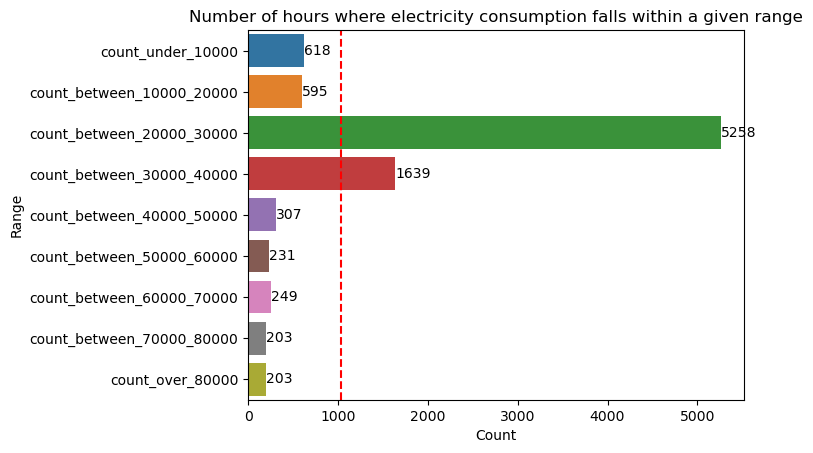

In [107]:
power_hour_count(df_106)

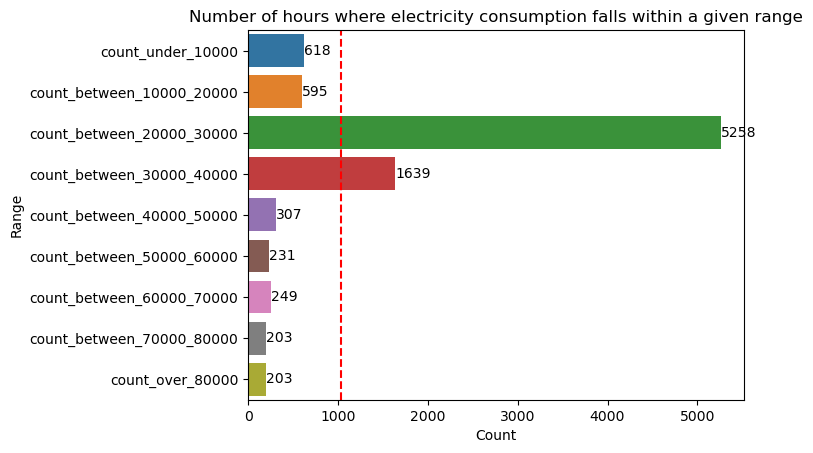

In [108]:
power_hour_count(df_106)

In [109]:
def isolate_peak(df):
    df_peak = df[df['electric-combined'] > 70000]
    return df_peak

In [110]:
df_106_peak = isolate_peak(df_106)

In [111]:
def day_consumption(df):
    df = df['electric-combined'].copy()
    sns.boxplot(data = df, x = df.index.day_name(), y = 'electric-combined')
    plt.show()

In [142]:
def day_consumption_outliersremoved(df):
    df = df['electric-combined'].copy().reset_index()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df > (Q1 - 1.5 * IQR)) & (df < (Q3 + 1.5 * IQR))]
    sns.boxplot(data = df, x = df.time.dt.day_name(), y = 'electric-combined')
    plt.show()
    display(df.head())


In [152]:
def hourly_consumption(df):
    display(df.head())
    df = df['electric-combined'].copy().reset_index()
    display(df.head())
    sns.boxplot(data = df, x = df.time.dt.hour, y = 'electric-combined')
    plt.show()

In [154]:
def hourly_consumption_outliersremoved(df):
    df = df['electric-combined'].copy().reset_index()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df > (Q1 - 1.5 * IQR)) & (df < (Q3 + 1.5 * IQR))]
    sns.boxplot(data = df, x = df.time.dt.hour, y = 'electric-combined')
    plt.show()
    display(df.head())

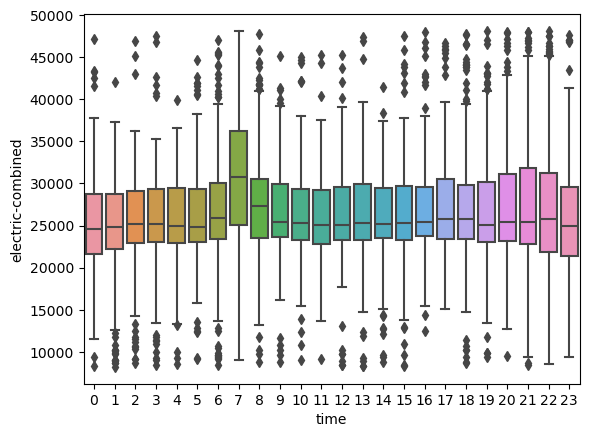

,time,electric-combined
0,2017-04-13 10:00:00,NaN
1,2017-04-13 11:00:00,NaN
2,2017-04-13 12:00:00,27318.0
3,2017-04-13 13:00:00,NaN
4,2017-04-13 14:00:00,NaN


In [155]:
hourly_consumption_outliersremoved(df_106)

,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,cooker,electric-combined,central-heating-flow,central-heating-return
time,,,,,,,,,
2017-04-13 10:00:00,71968,0.0,223.0,0.0,0.0,0.0,57887.0,0.0,0.0
2017-04-13 11:00:00,84989,0.0,0.0,0.0,0.0,0.0,66525.0,0.0,0.0
2017-04-13 12:00:00,62355,0.0,0.0,0.0,0.0,0.0,27318.0,0.0,0.0
2017-04-13 13:00:00,51814,0.0,0.0,0.0,0.0,0.0,70616.0,0.0,0.0
2017-04-13 14:00:00,63958,0.0,0.0,0.0,0.0,0.0,280779.0,0.0,0.0


,time,electric-combined
0,2017-04-13 10:00:00,57887.0
1,2017-04-13 11:00:00,66525.0
2,2017-04-13 12:00:00,27318.0
3,2017-04-13 13:00:00,70616.0
4,2017-04-13 14:00:00,280779.0


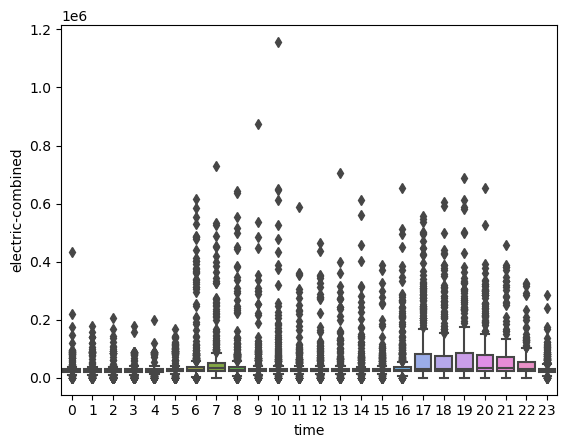

In [153]:
hourly_consumption(df_106)

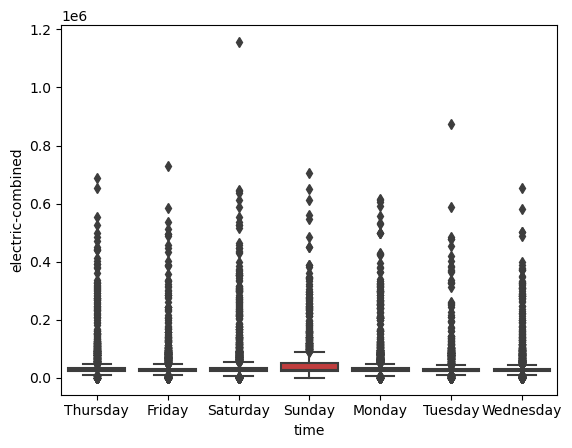

In [112]:
day_consumption(df_106)

In [113]:
def peak_season_breakdown(df, ax=None, homeid =None):
    df['season'] = df.index.to_series().dt.month%12 // 3 + 1

    season_counts = df['season'].value_counts().sort_index()

    # Calculate percentages
    season_percentages = pd.DataFrame(season_counts / df.shape[0] * 100)
    fig = season_percentages.T.plot(kind='bar', stacked=True, ax=ax)
    fig.set_xticklabels(['Season'], rotation=0)
    if ax is not None:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

    return fig


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/159411260.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

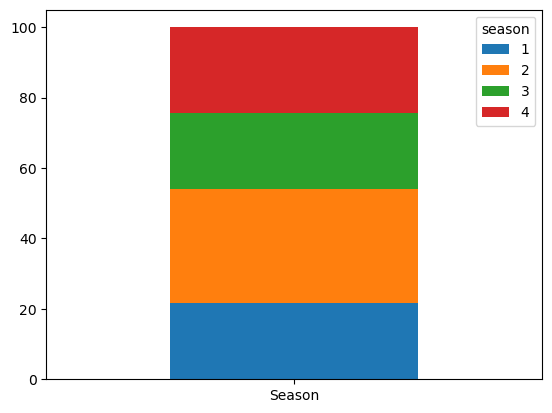

In [114]:
peak_season_breakdown(df_106_peak)

In [115]:
def peak_day_breakdown(df, ax=None, homeid=None):
    df['day_of_week'] = df.index.to_series().dt.dayofweek
    df['day_of_week'] = df.day_of_week.apply(lambda x: 'M' if x == 0 else 'T' if x == 1 else 'W' if x == 2 else 'Th' if x == 3 else 'F' if x == 4 else 'S' if x == 5 else 'Su' if x == 6 else x)

    day_of_week_counts = df['day_of_week'].value_counts().sort_index()


    # Calculate percentages
    day_of_week_percentages = pd.DataFrame(day_of_week_counts / df.shape[0] * 100)
    fig = day_of_week_percentages.T.plot(kind='bar',stacked=True, ax=ax)
    fig.set_xticklabels(['Day of week'], rotation=0)
    if ax is not None:
        ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4)
    


    return fig


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/1366439833.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/1366439833.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

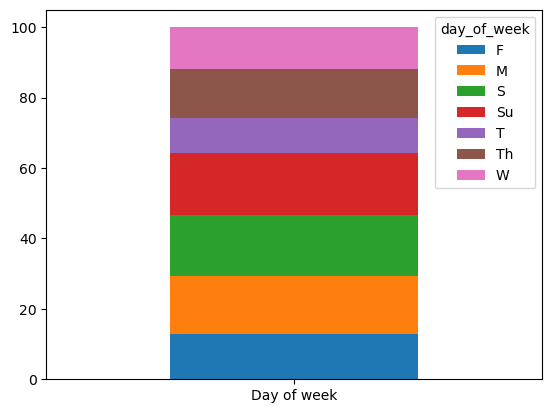

In [116]:
peak_day_breakdown(df_106_peak)

In [117]:
def peak_time_of_day(df, ax=None, homeid =None):
    def get_part_of_day(hour):
        return (
            "morning" if 5 <= hour <= 11
            else
            "afternoon" if 12 <= hour <= 17
            else
            "evening" if 18 <= hour <= 22
            else
            "night"
        )

    df['part_of_day'] = df.index.to_series().dt.hour.apply(get_part_of_day)

    part_of_day_counts = df['part_of_day'].value_counts().sort_index()

    # Calculate percentages
    part_of_day_percentages = pd.DataFrame(part_of_day_counts / df.shape[0] * 100)

    fig = part_of_day_percentages.T.plot(kind='bar', stacked=True, ax=ax)
    fig.set_xticklabels(['Time of day'], rotation=0)
    if ax is not None:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)



    return fig



In [118]:
def peak_combined_breakdown(df, homeid=None):

    fig, axs = plt.subplots(1, 3, figsize=(8, 5))
    peak_time_of_day(df, ax=axs[0])
    peak_day_breakdown(df, ax=axs[1])
    peak_season_breakdown(df, ax=axs[2])
    fig.suptitle('Peak electricity consumption breakdown')
    fig.text(0.5, 1,'hours with consumption over 1000', ha='center', va='top')
    plt.tight_layout()

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/2676000693.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/1366439833.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/1366439833.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

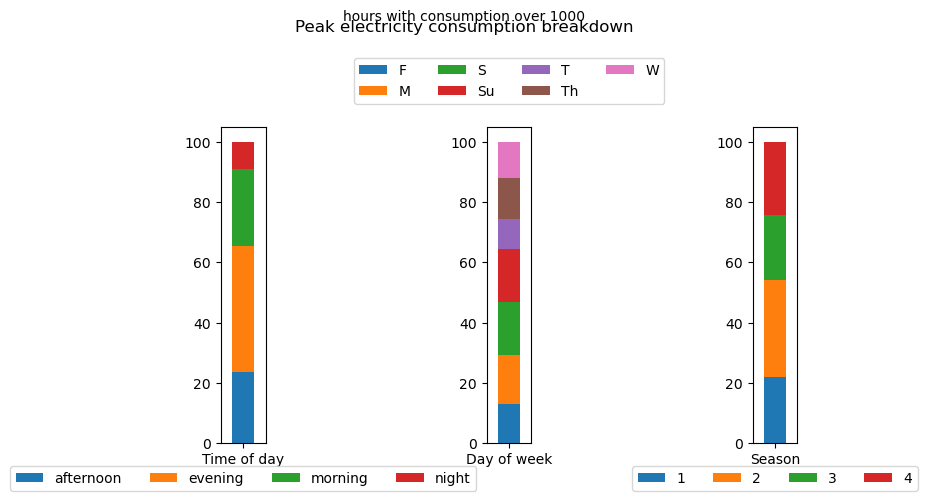

In [119]:
peak_combined_breakdown(df_106_peak)

In [156]:
def house_breakdown(homeid):
    df = df_combined(homeid)
    homeid = str(homeid)

    power_hour_count(df, homeid)
    day_consumption(df)
    day_consumption_outliersremoved(df)
    hourly_consumption2(df, homeid)
    hourly_consumption_outliersremoved(df)
    heatmap2(df, homeid)
    peak_combined_breakdown(df,homeid)
    
    
   

Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/601736614.py:14: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
file already exists for 82


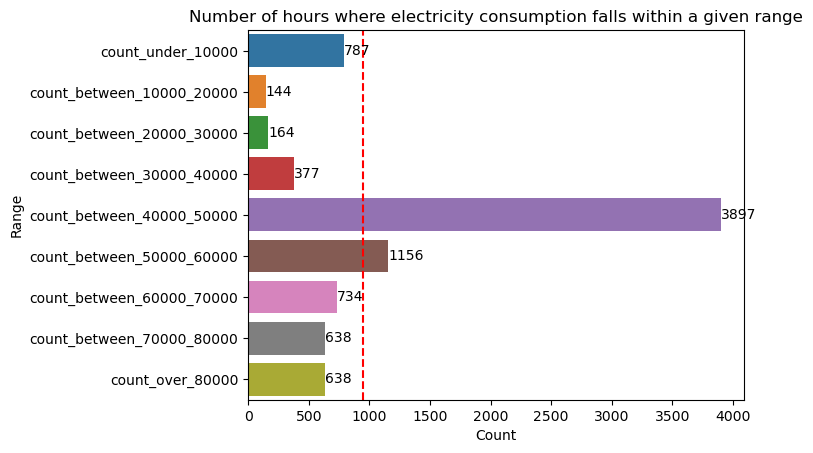

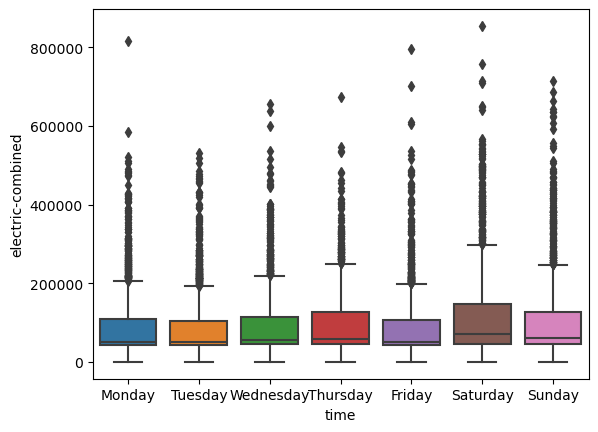

,time,electric-combined
0,2017-01-30 13:00:00,17103.0
1,2017-01-30 14:00:00,117811.0
2,2017-01-30 15:00:00,301734.0
3,2017-01-30 16:00:00,159785.0
4,2017-01-30 17:00:00,267911.0


<class 'pandas.core.frame.DataFrame'>


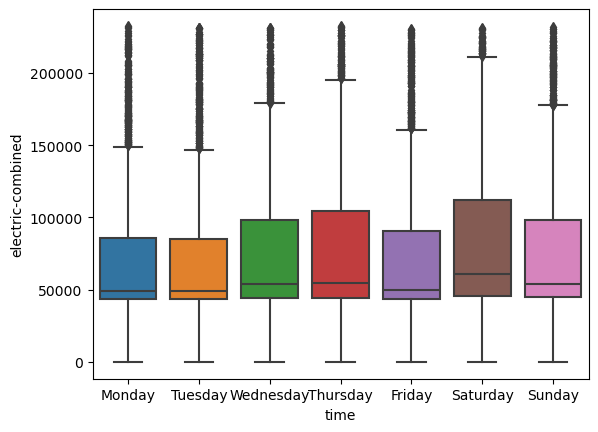

,time,electric-combined
0,2017-01-30 13:00:00,17103.0
1,2017-01-30 14:00:00,117811.0
2,2017-01-30 15:00:00,NaN
3,2017-01-30 16:00:00,159785.0
4,2017-01-30 17:00:00,NaN


average daily consumption: 94222.72739007664


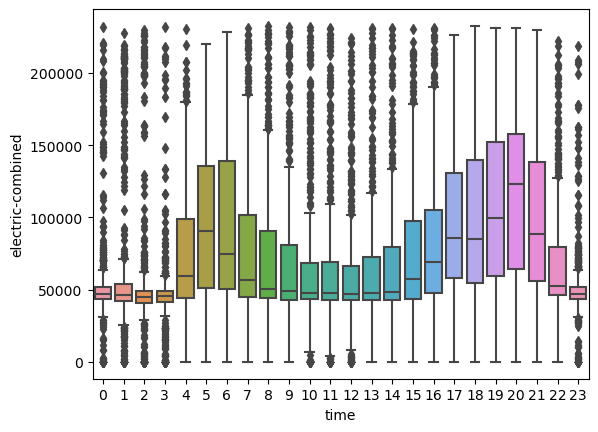

,time,electric-combined
0,2017-01-30 13:00:00,17103.0
1,2017-01-30 14:00:00,117811.0
2,2017-01-30 15:00:00,NaN
3,2017-01-30 16:00:00,159785.0
4,2017-01-30 17:00:00,NaN


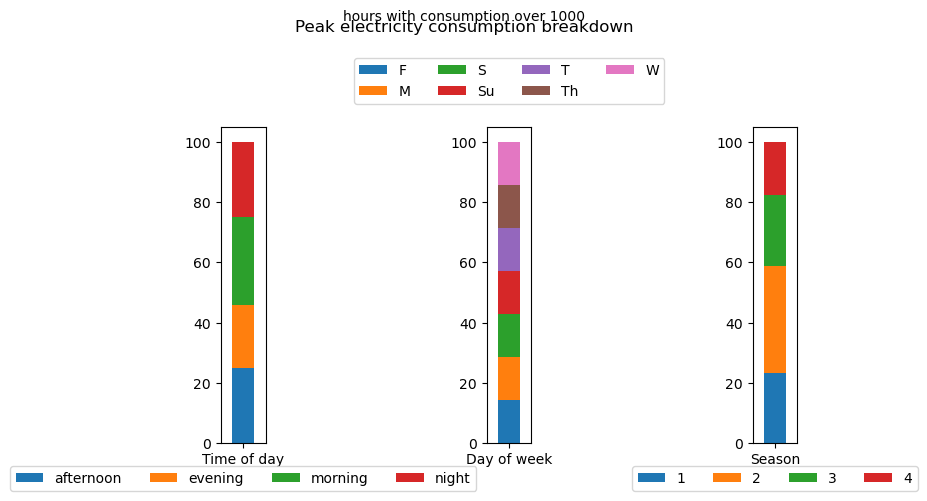

In [157]:
house_breakdown(82)

In [122]:
df_82 = df_combined(82)

Found entries for 4824 sensor readings.
no monitored appliances
Found entries for 1592 sensor readings.


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/601736614.py:14: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Edinburgh
file already exists for 82


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_2755/2682361694.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [123]:
display(df_82.head(20))

,hot-water-cold-pipe,hot-water-hot-pipe,gas,central-heating-flow,central-heating-return,electric-combined,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,electric_combined_1W_lagged_avg,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
time,,,,,,,,,,,,,,,,,,,,,
2017-01-30 13:00:00,13440,30392,0.0,0.0,0.0,17103.0,5.3,80,3,17.1,134,0.0,0.0,0.0,5.1,3,14.1,109,84,0,13
2017-01-30 14:00:00,56265,84800,948.0,34122.0,28985.0,117811.0,5.1,84,3,14.1,109,17103.0,0.0,0.0,5.1,3,9.9,109,85,0,14
2017-01-30 15:00:00,57955,72262,0.0,74916.0,65165.0,301734.0,5.1,85,3,9.9,109,117811.0,0.0,0.0,4.8,3,11.0,113,88,0,15
2017-01-30 16:00:00,53215,63330,0.0,0.0,0.0,159785.0,4.8,88,3,11.0,113,301734.0,0.0,0.0,4.6,3,16.3,112,88,0,16
2017-01-30 17:00:00,53415,61333,316.0,0.0,0.0,267911.0,4.6,88,3,16.3,112,159785.0,0.0,0.0,4.4,3,13.6,122,89,0,17
2017-01-30 18:00:00,51685,59433,0.0,0.0,0.0,196423.0,4.4,89,3,13.6,122,267911.0,0.0,0.0,4.2,3,12.9,117,89,0,18
2017-01-30 19:00:00,50980,56994,0.0,0.0,0.0,329488.0,4.2,89,3,12.9,117,196423.0,0.0,0.0,4.0,3,13.6,122,88,0,19
2017-01-30 20:00:00,45195,49821,632.0,0.0,0.0,181155.0,4.0,88,3,13.6,122,329488.0,0.0,0.0,3.8,3,12.9,120,88,0,20
2017-01-30 21:00:00,26580,29494,316.0,0.0,0.0,87697.0,3.8,88,3,12.9,120,181155.0,0.0,0.0,3.5,3,8.8,109,88,0,21
